# Properties of Convolution

A linear system's characteristics are completely specified by the system's impulse response, as governed by the mathematics of convolution. This is the basis of many signal processing
techniques. For example: Digital filters are created by *designing* an appropriate impulse response. Enemy aircraft are detected with radar by *analyzing* a measured impulse response. Echo suppression in long distance telephone calls is accomplished by creating an impulse response that *counteracts* the impulse response of the reverberation.

## Common Impulse Responses

### Delta Function

Identity:
$$x[n]*d[n] = x[n]$$ 

Amplification/Attenuation:
$$ x[n]*kd[n] = kx[n]$$

Shifting:
$$x[n]*d[n+s] = x[n+s]$$

Science and engineering are filled with cases where one signal is a shifted version of another. For example, consider a radio signal transmitted from a remote space probe, and the corresponding signal received on the earth. The time it takes the radio wave to propagate over the distance causes a delay between the transmitted and received signals. In biology, the electrical signals in adjacent nerve cells are shifted versions of each other, as determined by the time it takes an action potential to cross the synaptic junction that connects the two.

### Calculus-like Operation

The discrete operation the mimics the first derivative is called the *first difference*. Likewise, the discrete form of the integral is called the *running sum*.

These impulse responses are simple enough that a full convolution program is usually not needed to implement them. Rather, think of them in the alternative mode: each sample in the output signal is a sum of weighted samples from the input. 

For instance, they can be calculated as follows:

First Difference:
$$y[n]=x[n]-x[n-1]$$

Running Sum:
$$y[n]=x[n]+y[n-1]$$

The impulse response are:


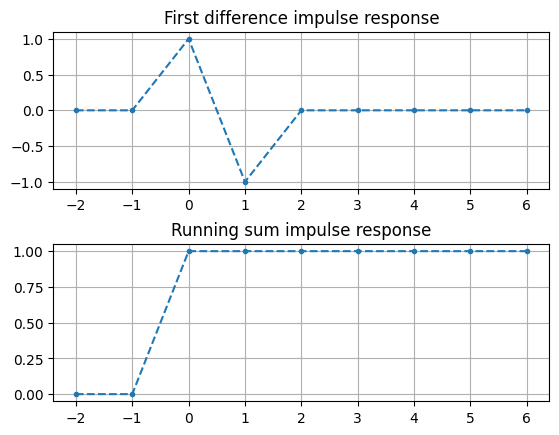

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

first_diff_impulse = np.array([0,0,1,-1,0,0,0,0,0])
running_sum_impulse = np.array([0,0,1,1,1,1,1,1,1])

fig, ax = plt.subplots(2)
plt.subplots_adjust(hspace = 0.35)
plt.figure()
ax[0].grid(True)
ax[0].title.set_text("First difference impulse response")
ax[0].plot(np.arange(-2,7), first_diff_impulse, ".--")
ax[1].grid(True)
ax[1].title.set_text("Running sum impulse response")
ax[1].plot(np.arange(-2,7), running_sum_impulse, ".--")
plt.show()

### Low-pass & High-pass Filters

The design of digital filters is covered in later chapters. For now, the general shapes of low-pass and high-pass *filter kernels* will be discussed. **In general, low-pass filter kernels are composed of a group of *adjacent positive points***. This results in each sample in the output signal being a weighted average of many adjacent points from the input signal. This averaging smoothes the signal, thereby removing high-frequency components.

Some low-pass filter kernels include a few negative valued samples in the tails, such as the Sinc function. Just as in analog electronics, digital low-pass filters are used for noise reduction, signal separation, wave shaping, etc.

As discussed in later chapters, each of LP filter kernels below is best for a particular purpose. The exponential kernel is the simplest recursive filter. The rectangular pulse is best at reducing noise while maintaining edge sharpness. The sinc function in (c), a curve of the form: sin(x)/(x) is used to separate one band of frequencies from another. 

The cutoff frequency of the filter is changed by making filter kernel wider or narrower. **If a low-pass filter has a gain of one at DC (zero frequency), then the sum of all of the points in the impulse response must be equal to one.**

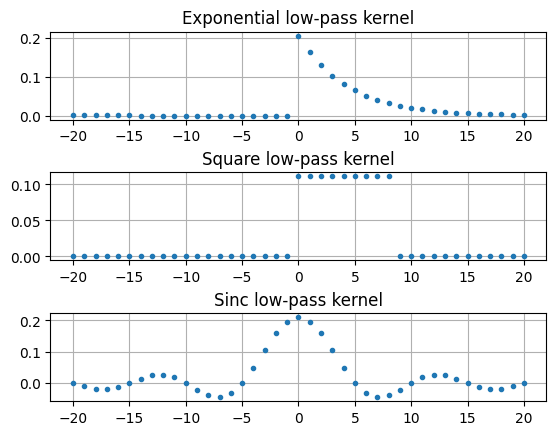

<Figure size 640x480 with 0 Axes>

In [2]:
x = np.arange(-20,21)

# trapz() used to normalize area under curve to 1

# Create exponential impulse
tau = -(len(x)-1) / np.log(0.0001)
LP_exp_kernel = np.roll(signal.exponential(len(x), 0, tau, False), len(x)//2)
LP_exp_kernel /= np.trapz(LP_exp_kernel)

# Create square impulse
LP_square_kernel = np.hstack( (np.zeros(20), np.ones(9), np.zeros(12)) )
LP_square_kernel /= np.trapz(LP_square_kernel)

# Create sinc kernel
LP_sinc_kernel = np.sinc(np.linspace(-4, 4, 41))
LP_sinc_kernel /= np.trapz(LP_sinc_kernel)

fig, ax = plt.subplots(3)
plt.subplots_adjust(hspace = 0.6)
plt.figure()
ax[0].grid(True)
ax[0].title.set_text("Exponential low-pass kernel")
ax[0].plot(x, LP_exp_kernel, ".")
ax[1].grid(True)
ax[1].title.set_text("Square low-pass kernel")
ax[1].plot(x, LP_square_kernel, ".")
ax[2].grid(True)
ax[2].title.set_text("Sinc low-pass kernel")
ax[2].plot(x, LP_sinc_kernel, ".")
plt.show()

High-pass filters are derived from the corresponding low-pass filter kernels. This is a common strategy in filter design: first devise a low-pass filter and then transform it to what you
need, high-pass, band-pass, band-reject, etc. To understand the low-pass to high-pass transform, remember that a delta function impulse response passes the entire signal, while a low-pass impulse response passes only the low-frequency components. By superposition, a filter kernel consisting of a delta function minus the low-pass filter kernel will pass the entire signal minus the
low-frequency components. A high-pass filter is born! **The delta function is usually added at the center of symmetry, or sample zero if the filter kernel is not symmetrical. High-pass filters have zero gain at DC (zero frequency), achieved by making the sum of all the points in the filter kernel equal to zero.**

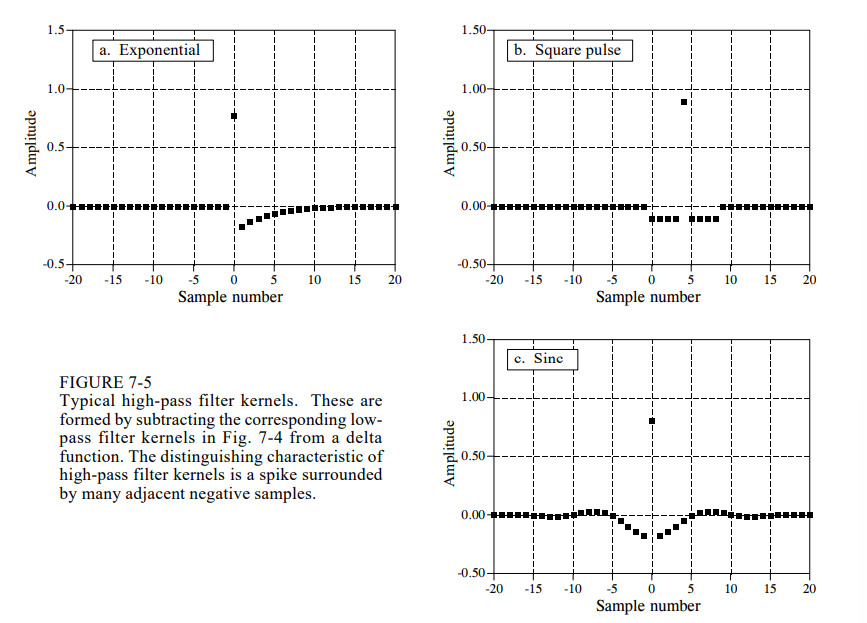

## Mathematical Properties

### Commutative Property

$$a[n]*b[n]=b[n]*a[n]$$

The order in which two signals are convolved makes no difference. In any linear system, the input signal and the system's impulse response can be exchanged without changing the output signal. This is interesting, but usually doesn't have any physical meaning. The input signal and the impulse response are very different things. Just because the mathematics allows you to do something, doesn't mean that it makes sense to do it. For example, suppose you make: $10/hour × 2,000 hours/year = $20,000/year. The commutative property for multiplication provides that you can make the same annual salary by only working 10 hours/year at $2000/hour. Let's see you convince your boss that this is meaningful! In spite of this, the commutative property sees great use in DSP for manipulating equations, just
as in ordinary algebra.

### Associative Property

Is it possible to convolve three or more signals? The answer is yes, and the associative property describes how: convolve two of the signals to produce an intermediate signal, then convolve the intermediate signal with the third signal. The associative property provides that the order of the convolutions doesn't matter. As an equation:

$$(a[n]*b[n])*c[n]=a[n]*(b[n]*c[n])$$

The associative property is used in system theory to describe how **cascaded systems** behave. Two or more systems are said to be in a *cascade* if the output of one system is used as the input for the next system. From the associative property, the order of the systems can be rearranged without changing the overall response of the cascade. Further, any number of cascaded systems can be replaced with a single system. **The impulse response of the replacement system is found by convolving the impulse responses of all of the original systems.**

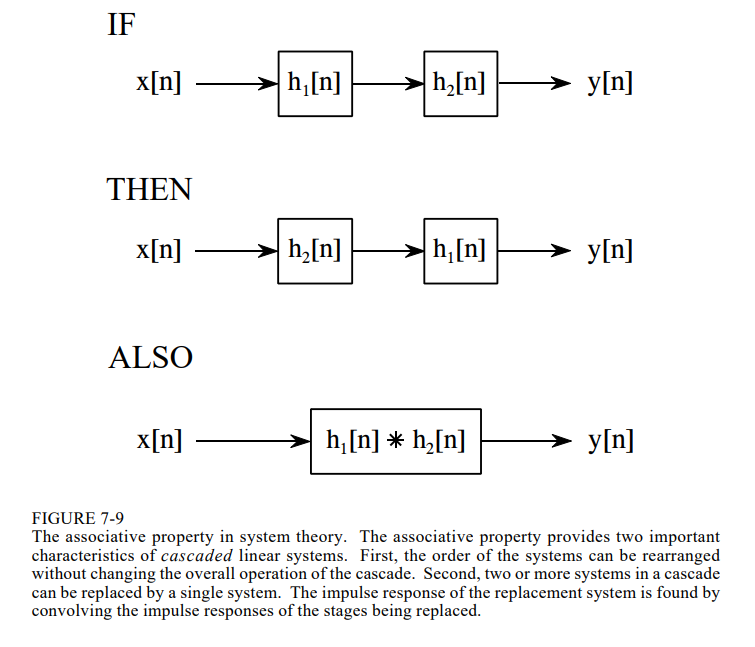

### Distributive Property

In equation form, the distributive property is written:

$$a[n]*b[n]+a[n]*c[n]=a[n]*(b[n]+c[n])$$

The distributive property describes the operation of parallel systems with added outputs. Two or more systems can share the same input, x[n], and have their outputs added to produce y[n]. **The distributive property allows this combination of systems to be replaced with a single system, having an impulse response equal to the sum of the impulse responses of the original systems.** 

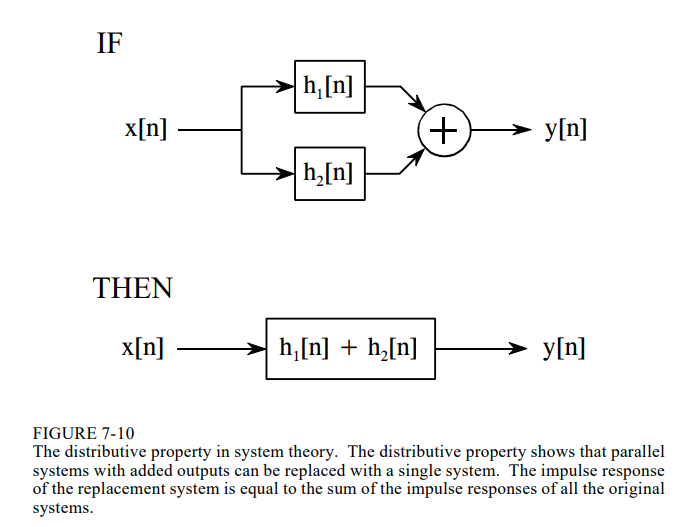

### Transference between Input & Output

Rather than being a formal mathematical property, this is a way of thinking
about a common situation in signal processing. The question is, how does the change in the input signal relate to the change in the output signal? The answer is: the output signal is changed in exactly the same linear way that the input signal was changed. 

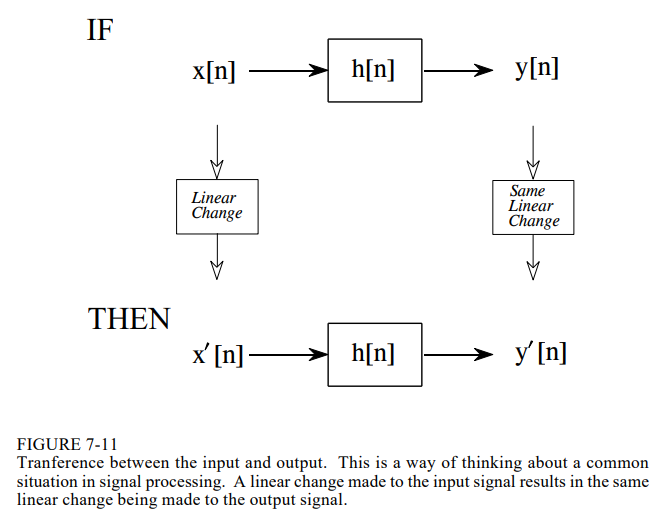

### The Central Limit Theorem

The Central Limit Theorem is an important tool in probability theory because it mathematically explains why the Gaussian probability distribution is observed so commonly in nature. For example: the amplitude of thermal noise in electronic circuits follows a Gaussian distribution; the cross-sectional intensity of a laser beam is Gaussian; even the pattern of holes around a dart board bull's eye is Gaussian. In its simplest form, the Central Limit Theorem states that a Gaussian distribution results when the observed variable is the sum of many random processes. Even if the component processes do not have a Gaussian distribution, the sum of them will. 

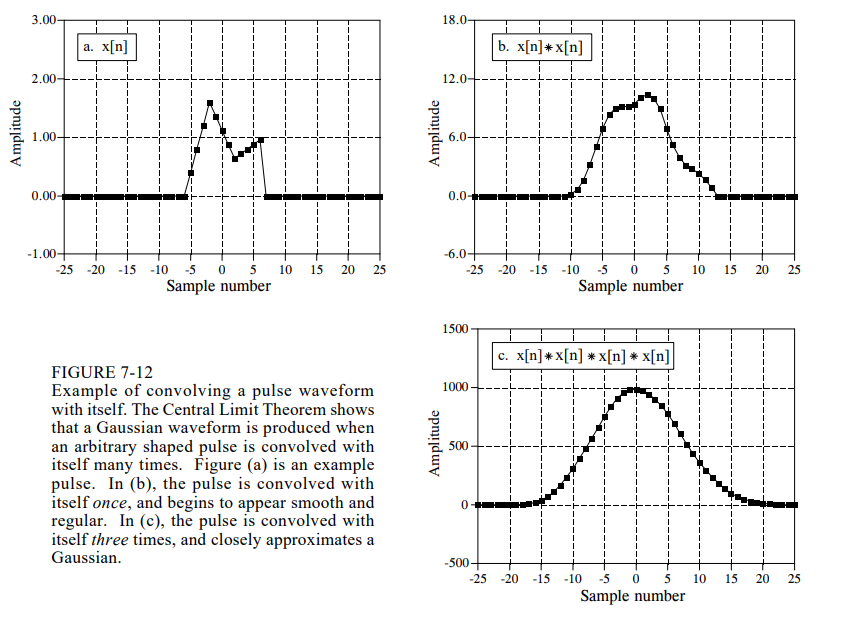

The signal in (a) is an irregular pulse, purposely chosen to be very unlike a Gaussian. Figure (b) shows the result of convolving this signal with itself one time. Figure (c) shows the result of convolving this signal with itself three times. Even with only three convolutions, the waveform looks very much like a Gaussian. In mathematics jargon, the procedure converges to a Gaussian very quickly. The width of the resulting Gaussian is equal to the width of the original pulse multiplied by the square root of the number of convolutions.

## Correlation

The concept of correlation can best be presented with an example. Figure 7-13 shows the key elements of a radar system. A specially designed antenna transmits a short burst of radio wave energy in a selected direction. If the propagating wave strikes an object, such as the helicopter in this illustration, a small fraction of the energy is reflected back toward a radio receiver located near the transmitter. The transmitted pulse is a specific shape that we have selected, such as the triangle shown in this example. The received signal will consist of two parts: (1) a shifted and scaled version of the transmitted pulse, and (2) random noise, resulting from interfering radio waves, thermal noise in the electronics, etc. Since radio signals travel at a known rate, the speed of light, the shift between the transmitted and received pulse is a direct measure of the distance to the object being detected. **This is the problem: given a signal of some known shape, what is the best way to determine where (or if) the signal occurs in another signal.** Correlation is the answer.

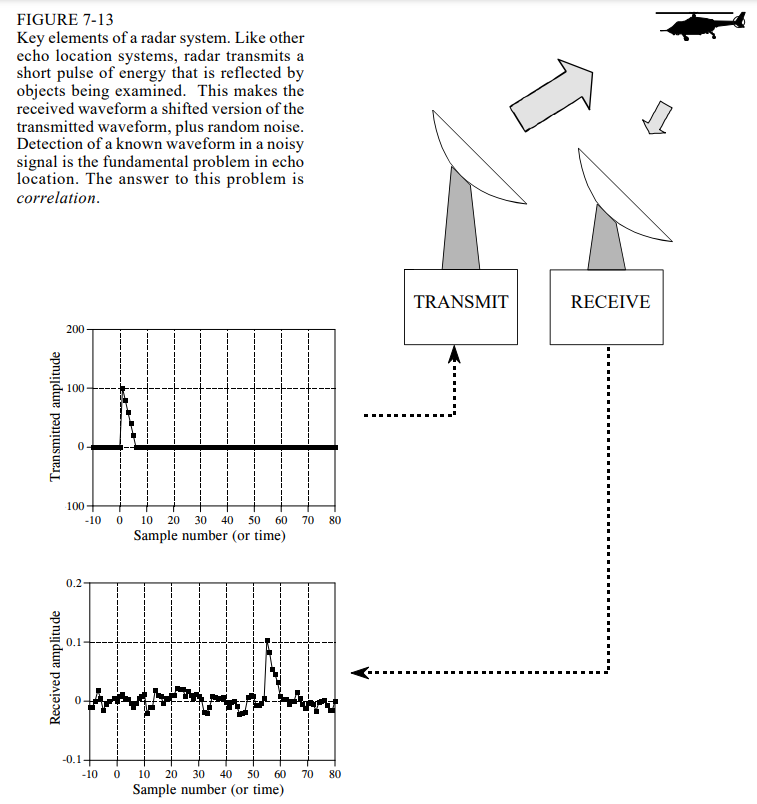

Correlation is a mathematical operation that is very similar to convolution. Just as with convolution, correlation uses two signals to produce a third signal. This third signal is called the **cross-correlation** of the two input signals. If a signal is correlated with itself, the resulting signal is instead called the **autocorrelation.**

Below is an example of a **correlation machine**, which is quite similar to a **convolution machine**:

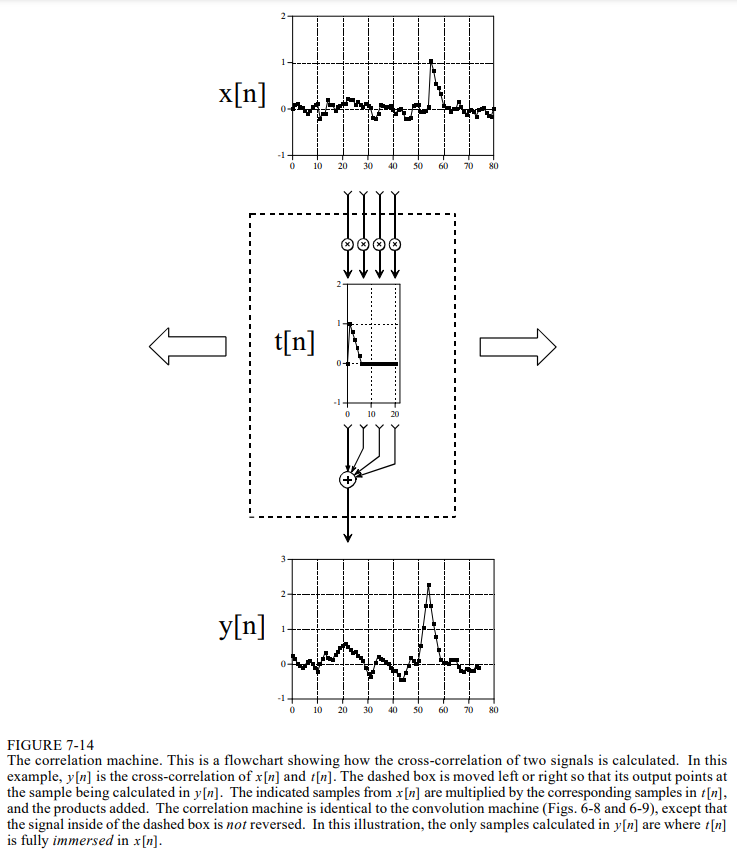

The received signal, x[n], and the cross-correlation signal, y[n], are fixed on the page. The waveform we are looking for, t[n], commonly called the **target signal**, is contained within the correlation machine. The operation is performed just like convolution.

The amplitude of each sample in the cross-correlation signal is a measure of how much the received signal *resembles* the target signal, at *that location*. This means that a peak will occur in the cross-correlation signal for every target signal that is present in the received signal. In other words, the value of the cross-correlation is maximized when the target signal is aligned with the same features in the received signal.

What if the target signal contains samples with a negative value? Nothing changes. Imagine that the correlation machine is positioned such that the target signal is perfectly aligned with the matching waveform in the received signal. As samples from the received signal fall into the correlation machine, they are multiplied by their matching samples in the target signal. Neglecting noise, a positive sample will be multiplied by itself, resulting in a positive number. Likewise, a negative sample will be multiplied by itself, also resulting in a positive number. Even if the target signal is completely negative, the peak in the cross-correlation will still be positive. 

If there is noise on the received signal, there will also be noise on the cross correlation signal. It is an unavoidable fact that random noise looks a certain amount like any target signal you can choose. The noise on the cross-correlation signal is simply measuring this similarity. Except for this noise, the peak generated in the cross-correlation signal is symmetrical between its left and right. This is true even if the target signal isn't symmetrical. In addition, the width of the peak is twice the width of the target signal. Remember, the cross-correlation is trying to detect the target signal, not recreate it. There is no reason to expect that the peak will even look like the target signal. 

**Correlation is the *optimal* technique for detecting a known waveform in random noise.** That is, the peak is higher above the noise using correlation than can be produced by any other linear system. (To be perfectly correct, **it is only optimal for random white noise**). Using correlation to detect a known waveform is frequently called **matched filtering**. More on this in Chapter 17. 

The correlation machine and convolution machine are identical, except for one small difference. The signal inside of the convolution machine is flipped left-for-right. Since this signal reversal is the only difference between the two operations, it is possible to represent correlation using the same mathematics as convolution:

$$a[n]*b[-n]=c[n]$$

Don't let the mathematical similarity between convolution and correlation fool you; they represent very different DSP procedures. Convolution is the relationship between a system's input signal, output signal, and impulse response. Correlation is a way to detect a known waveform in a noisy background. The similar mathematics is only a convenient coincidence. 

### Python Demo

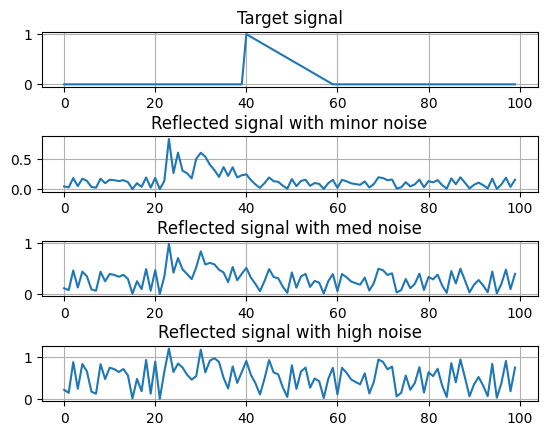

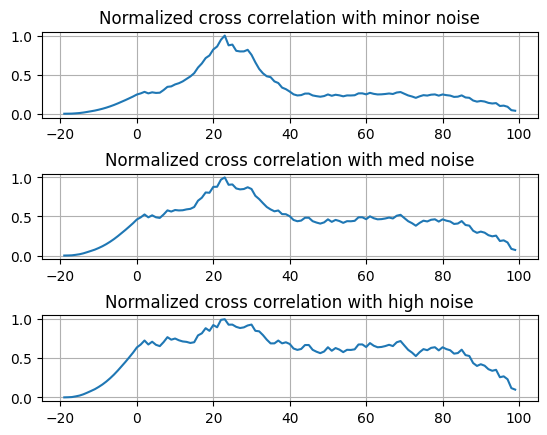

In [95]:
# Create a target signal
target = np.linspace(1,0,20)

# Create a randomly shifted signal with different noise levels
noisy_signal = np.random.rand(100)*np.pad(target,(0,80))    # Add noise to reflected signal
noisy_signal = np.roll(noisy_signal, np.random.randint(80)) # Delay reflected signal
noise_floor = np.random.rand(100)                           # Add noise floor
rx_signal_lowNoise = noisy_signal + 0.2*noise_floor 
rx_signal_medNoise = noisy_signal + 0.5*noise_floor
rx_signal_highNoise = noisy_signal + 0.95*noise_floor
rx_signal_2d = np.stack((rx_signal_lowNoise, rx_signal_medNoise, rx_signal_highNoise))

# Cross correlate
xCorr_2d = np.empty([3, len(target) + len(noisy_signal) - 1]) # N+M-1
lags = signal.correlation_lags(len(rx_signal_2d[0]), len(target))
for row in range(0,3):
    xCorr_2d[row,:] = signal.correlate(rx_signal_2d[row,:], target)
    xCorr_2d[row,:] /= max(xCorr_2d[row,:]) # Normalize

fig,ax = plt.subplots(4)
plt.subplots_adjust(hspace = 0.9)
ax[0].grid(True)
ax[0].title.set_text("Target signal")
ax[0].plot(np.pad(target, (40,40)))
ax[1].grid(True)
ax[1].title.set_text("Reflected signal with minor noise")
ax[1].plot(rx_signal_2d[0])
ax[2].grid(True)
ax[2].title.set_text("Reflected signal with med noise")
ax[2].plot(rx_signal_2d[1])
ax[3].grid(True)
ax[3].title.set_text("Reflected signal with high noise")
ax[3].plot(rx_signal_2d[2])

fig,ax = plt.subplots(3)
plt.subplots_adjust(hspace = 0.65)
ax[0].grid(True)
ax[0].title.set_text("Normalized cross correlation with minor noise")
ax[0].plot(lags, xCorr_2d[0])
ax[1].grid(True)
ax[1].title.set_text("Normalized cross correlation with med noise")
ax[1].plot(lags, xCorr_2d[1])
ax[2].grid(True)
ax[2].title.set_text("Normalized cross correlation with high noise")
ax[2].plot(lags, xCorr_2d[2])

plt.show()

The cross correlation does an excellent job of extracting the target signal even in high noise environments. Awesome!

#### Correlation Caveat

The commutative property establishes that it doesn't matter which input of the convolution is flipped, the output will be the same. However, this is not the same case with cross correlation:

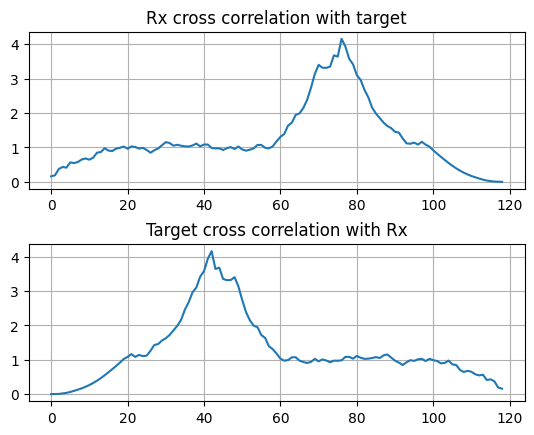

In [102]:
xCorr_t_rx = signal.correlate(rx_signal_2d[0,:], target)
xCorr_rx_t = signal.correlate(target, rx_signal_2d[0,:])

fig,ax = plt.subplots(2)
plt.subplots_adjust(hspace = 0.35)
ax[0].grid(True)
ax[0].title.set_text("Rx cross correlation with target")
ax[0].plot(xCorr_rx_t)
ax[1].grid(True)
ax[1].title.set_text("Target cross correlation with Rx")
ax[1].plot(xCorr_t_rx)

This is because cross correlation "pre-flips" one of the signals before performing a convolution operation, which adds this asymmetry. The best way to associate the proper output is to think about which signal slides across the other to produce the cross correlation output. 

The first subplot can be thought as the Rx signal sliding across the target signal. Likewise, the second subplot can be though as the target signal sliding across the Rx signal to produce its corresponding output.